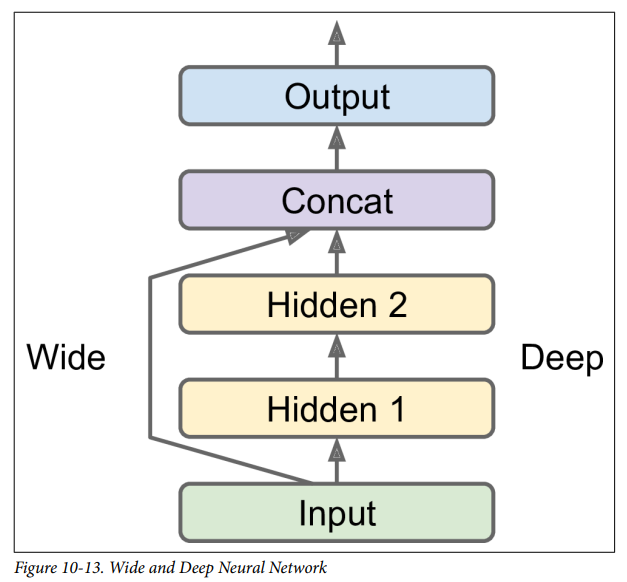

##### One example of the non-sequential neural network is a wide and deep neural network. It connects all or part  of the inputs directly to the output layer, as shown in above figure. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack od layers; thus, simple pattern in the data may end up being distorted by this sequence of transfomations.

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
housing = fetch_california_housing()

In [17]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [19]:
from tensorflow import keras

In [20]:
## let's build above mentioned neural network to tackle the california housing problem
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

## creating a model using these layers
model = keras.Model(inputs=[input_], outputs=[output])

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

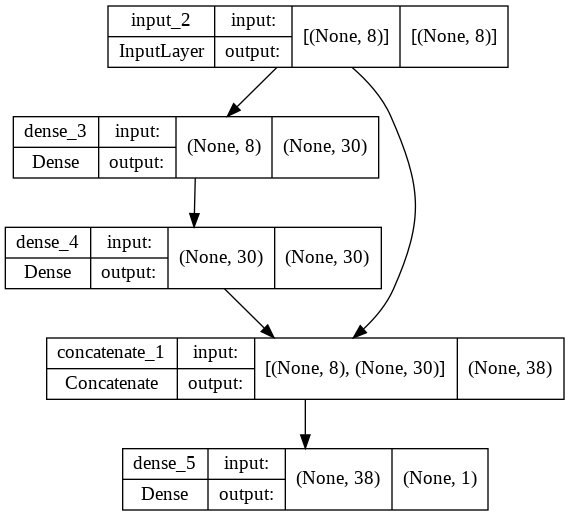

In [22]:
## visualizing the model
keras.utils.plot_model(model, show_shapes=True)

In [23]:
## compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

In [24]:
##  Creating a callback to be used in fit method
model_checkpoint = keras.callbacks.ModelCheckpoint('kerasExample1Model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [25]:
## fitting the model onto the training data
## we will not give very large value of epochs since in that case model may overfit the data

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9451 - val_loss: 0.4535
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7548 - val_loss: 0.4137
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4982 - val_loss: 0.3921
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4402 - val_loss: 0.3789
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3766 - val_loss: 0.3656
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3704 - val_loss: 0.3934
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3844 - val_loss: 0.3647
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3882 - val_loss: 0.3551
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3834 - val_loss: 0.3538
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3497 - val_lo

In [26]:
import pandas as pd
history_df = pd.DataFrame(history.history)

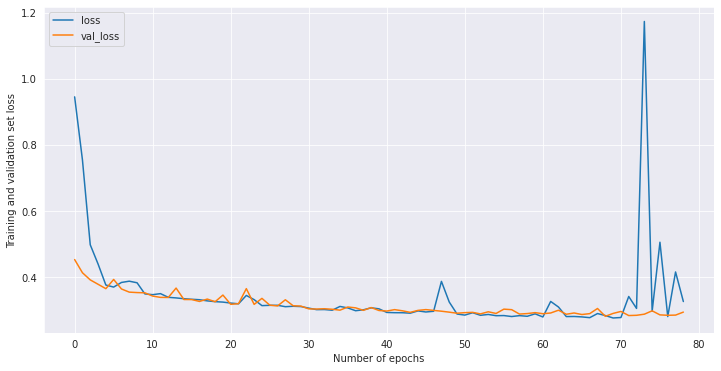

In [28]:
## plotting the history_df
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
history_df.plot(figsize=(12,6))
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Training and validation set loss')
plt.show();